# **TEMP ANALYSIS**

## Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [ ]:
############ UPLOAD THE DATASET #################
# Reding the co2 dataset
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/sensor_data_hourly.csv'
df= pd.read_csv(data_url, index_col='Time',parse_dates=True, sep=',')
#https://otexts.com/fpp2/estimation-and-model-selection.html


In [ ]:

df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq=None)

In [ ]:
df.index.freq = 'H'
df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq='H')

## Split the dataset

In [ ]:
df['CO2']=df['CO2'].interpolate(method='linear')
train_data= df.iloc[1500:3100]
test_data = df.iloc[3100:3200] #3373

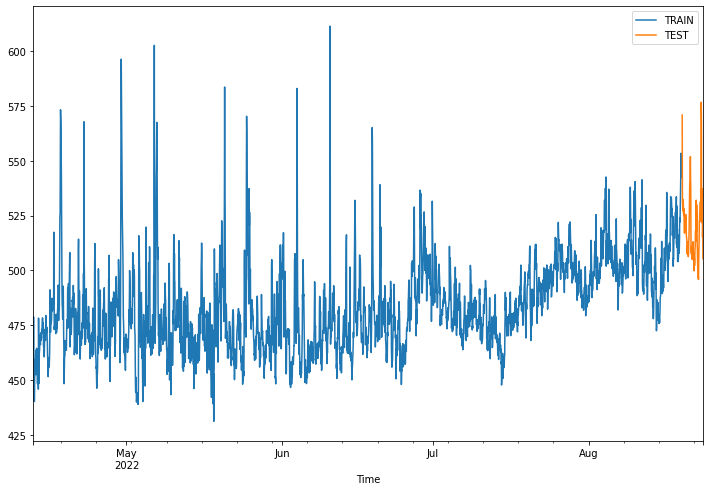

In [ ]:
train_data['CO2'].plot(legend=True,label='TRAIN')
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8))

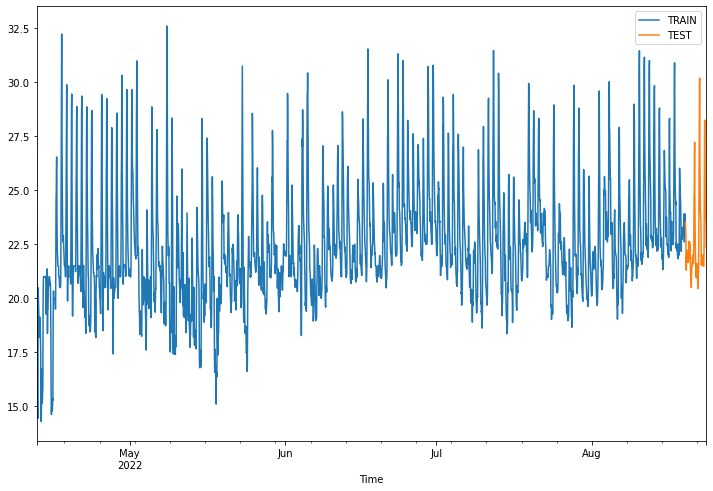

In [ ]:
train_data['TEMP'].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))

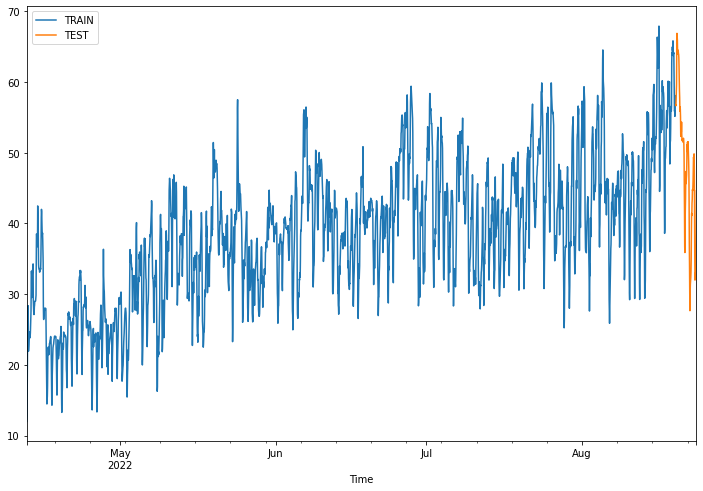

In [ ]:
train_data['HUM'].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8))

## TEMP

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train_data[['TEMP','HUM']])

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train_data[['TEMP','TEMP']])
scaled_test = scaler.transform(test_data[['TEMP','TEMP']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- HUM

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- HUM

  warnings.warn(message, FutureWarning)


In [ ]:
scaled_train=scaled_train[:,0]
scaled_test = scaled_test[:,0]

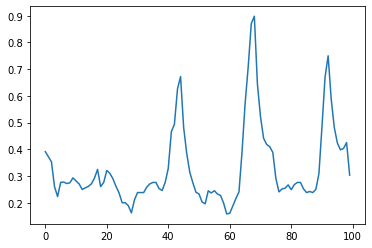

In [ ]:
plt.plot(scaled_test)
plt.show()

In [ ]:
scaled_test


array([0.39155219, 0.37262873, 0.35365854, 0.2607233 , 0.22357724,
       0.27642276, 0.27773105, 0.27220717, 0.27506775, 0.29343052,
       0.28184282, 0.27100271, 0.25025699, 0.25609756, 0.26151762,
       0.27118961, 0.29268293, 0.32520325, 0.2607233 , 0.27642276,
       0.32113821, 0.31043828, 0.2899729 , 0.26151762, 0.2371741 ,
       0.20054201, 0.20054201, 0.1897019 , 0.16260163, 0.21100832,
       0.23848238, 0.23848238, 0.23848238, 0.25880759, 0.27100271,
       0.27642276, 0.27642276, 0.25338753, 0.24633212, 0.27642276,
       0.32926829, 0.46612466, 0.49422865, 0.62601626, 0.67208672,
       0.48238482, 0.38482385, 0.31436314, 0.27506775, 0.23988758,
       0.23324923, 0.20325203, 0.19647696, 0.24502383, 0.23712737,
       0.24550838, 0.23306233, 0.22764228, 0.19918699, 0.15867676,
       0.16124661, 0.18834688, 0.21624147, 0.24119241, 0.39159892,
       0.57209607, 0.70867209, 0.8699187 , 0.89786001, 0.64363144,
       0.52238109, 0.44184282, 0.41869919, 0.40986824, 0.38888

 Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

 Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

## DEEP LEARNING

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Let's redefine to get 7 days back and then predict the next day out
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.76255741 0.60828843 0.42375149 0.19174199 0.06639424 0.02538603
 0.00791209 0.2636242  0.33782953 0.30392537 0.28803385 0.26655336
 0.24453417 0.21285213 0.26167143 0.26433124 0.26264781 0.25773222
 0.22456876 0.20308827 0.16534591 0.04491375 0.         0.02582372
 0.13278849 0.08494558 0.04656351 0.04491375 0.06053593 0.07578775
 0.08494558 0.27436445 0.33880592 0.36614472 0.36614472 0.36614472]
Predict this y: 
 [0.36614472]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [ ]:
# define model
model = Sequential()
model.add(LSTM(300, activation='relu', input_shape=(n_input, n_features)))  ### best 250
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               252000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1576/1576 [==============================] - 33s 20ms/step - loss: 0.3748
Epoch 2/20
1576/1576 [==============================] - 31s 20ms/step - loss: 0.0063
Epoch 3/20
1576/1576 [==============================] - 33s 21ms/step - loss: 0.0042
Epoch 4/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0034
Epoch 5/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0031
Epoch 6/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0027
Epoch 7/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0027
Epoch 8/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0026
Epoch 9/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0025
Epoch 10/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0023
Epoch 11/20
1576/1576 [==============================] - 32s 20ms/step - loss: 0.0025
Epoch 12/20
1576/1576 [==============================] - 32s 20ms/step - l

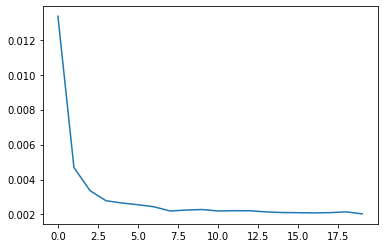

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


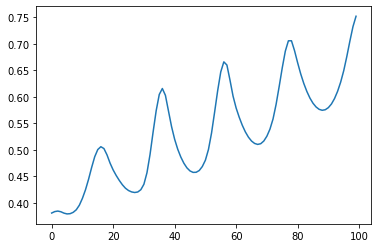

In [ ]:
plt.plot(test_predictions)
plt.show()

##### Inverse Transformations and Compare

In [ ]:
test=pd.DataFrame(({'TEMP_1':test_predictions,
                    'TEMP_2':test_predictions}))

In [ ]:
true_predictions=scaler.inverse_transform(test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


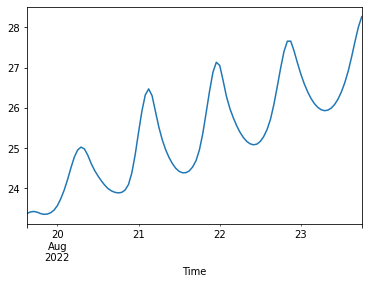

In [ ]:
test_data['TEMP_Pred']=true_predictions[:,0]
test_data['TEMP_Pred'].plot()


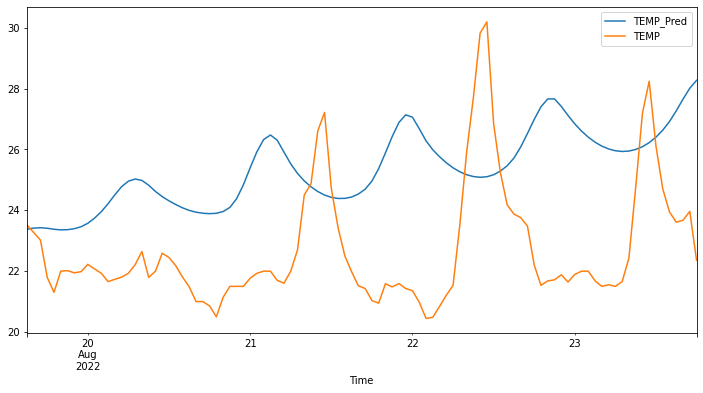

In [ ]:
test_data['TEMP_Pred'].plot(legend=True,figsize=(12,6))
test_data['TEMP'].plot(legend=True,figsize=(12,6))

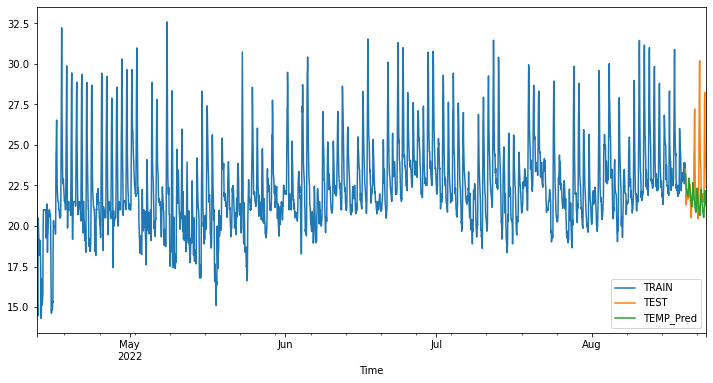

In [ ]:
train_data['TEMP'].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))
test_data['TEMP_Pred'].plot(legend=True,figsize=(12,6))

Stacked LSTM
Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features))) #best 100,50
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1576/1576 [==============================] - 25s 14ms/step - loss: 0.0171
Epoch 2/20
1576/1576 [==============================] - 22s 14ms/step - loss: 0.0043
Epoch 3/20
1576/1576 [==============================] - 24s 15ms/step - loss: 0.0034
Epoch 4/20
1576/1576 [==============================] - 23s 14ms/step - loss: 0.0029
Epoch 5/20
1576/1576 [==============================] - 22s 14ms/step - loss: 0.0028
Epoch 6/20
1576/1576 [==============================] - 23s 14ms/step - loss: 0.0027
Epoch 7/20
1576/1576 [==============================] - 23s 14ms/step - loss: 0.0025
Epoch 8/20
1576/1576 [==============================] - 23s 14ms/step - loss: 0.0025
Epoch 9/20
1576/1576 [==============================] - 22s 14ms/step - loss: 0.0026
Epoch 10/20
1576/1576 [==============================] - 22s 14ms/step - loss: 0.0024
Epoch 11/20
1576/1576 [==============================] - 23s 14ms/step - loss: 0.0025
Epoch 12/20
1576/1576 [==============================] - 23s 14ms/step - l

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
test=pd.DataFrame(({'TEMP1':test_predictions,
                    'TEMP2':test_predictions}))

In [ ]:
true_predictions=scaler.inverse_transform(test)
true_predictions

array([[23.26270767, 41.11060385],
       [23.09305018, 40.56145203],
       [22.8951059 , 39.9207408 ],
       [22.66455968, 39.17450271],
       [22.40960234, 38.3492501 ],
       [22.21276523, 37.71212258],
       [22.0835341 , 37.29382387],
       [22.02394537, 37.1009455 ],
       [22.04981398, 37.1846777 ],
       [22.21946793, 37.73381808],
       [22.54506173, 38.78770862],
       [22.97236691, 40.17082124],
       [23.50290853, 41.8880923 ],
       [24.08558445, 43.77411302],
       [24.60577627, 45.45788357],
       [24.93840857, 46.53455654],
       [25.00128818, 46.73808688],
       [24.72662568, 45.84905211],
       [24.16737113, 44.03884231],
       [23.55864711, 42.06850841],
       [23.06830013, 40.48134041],
       [22.65678476, 39.14933665],
       [22.29220954, 37.96927001],
       [21.94997013, 36.86150051],
       [21.63043768, 35.82722948],
       [21.34510922, 34.90367082],
       [21.10464246, 34.12532172],
       [20.90500759, 33.47913831],
       [20.74612387,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


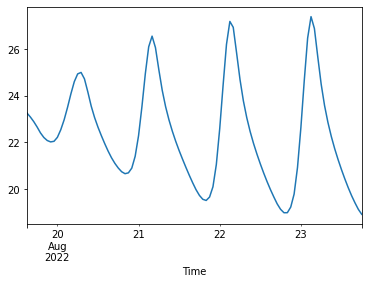

In [ ]:
test_data['TEMP_Pred2']=true_predictions[:,0]
test_data['TEMP_Pred2'].plot()

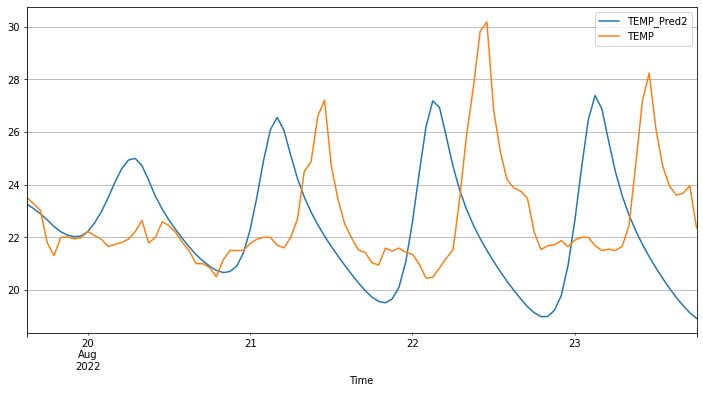

In [ ]:
#test_data['TEMP_Pred'].plot(legend=True,figsize=(12,6))
test_data['TEMP_Pred2'].plot(legend=True,figsize=(12,6))
test_data['TEMP'].plot(legend=True,figsize=(12,6))
plt.grid()
plt.savefig('TEMP_NN')

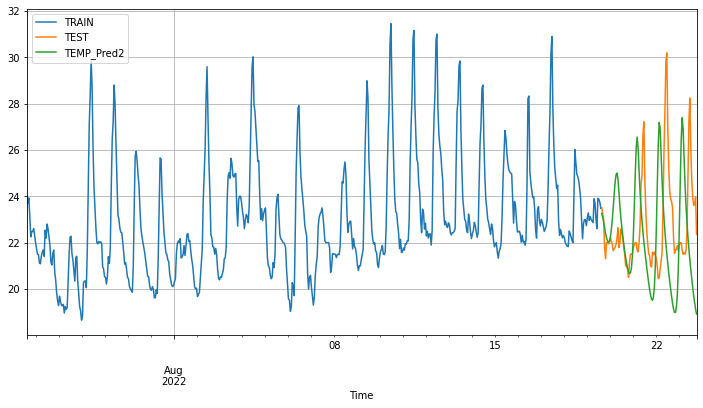

In [ ]:
train_data['TEMP'].iloc[1000:].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))
test_data['TEMP_Pred2'].plot(legend=True,figsize=(12,6))
plt.grid()
plt.savefig('TEMP_NN_3')
##test_data['TEMP_Pred'].plot(legend=True,figsize=(12,6))

Bidirectional LSTM
On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

This is called a Bidirectional LSTM.

We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse,rmspe,maxabs,meanabs
#co2
def mea_stats(y,y_hat):
  error1 = mse(y, y_hat)
  error2 = rmse(y, y_hat)
  error3 = rmspe(y, y_hat)
  error4 = maxabs(y, y_hat)
  error5 = meanabs(y, y_hat)
  print(f' MSE Error: {error1:11.10}')
  print(f' RMSE Error: {error2:11.10}')
  print(f'Root Mean Squared Percentage Error:{error3:11.10}')
  print(f' maximum absolute error: {error4:11.10}')
  print(f' mean absolute Error: {error5:11.10}')

In [ ]:
mea_stats(test_data['TEMP'],test_data['TEMP_Pred'])

 MSE Error: 12.21169152
 RMSE Error: 3.494523074
Root Mean Squared Percentage Error:1.588761031
 maximum absolute error:  5.97956879
 mean absolute Error: 3.102151053


In [ ]:
mea_stats(test_data['TEMP'],test_data['TEMP_Pred2'])

 MSE Error: 10.36736006
 RMSE Error: 3.219838514
Root Mean Squared Percentage Error:1.356451594
 maximum absolute error: 8.685478437
 mean absolute Error: 2.506735076
